# Expression Plots

Aggregate gene set expression plots at single-cell level. Inputs:

1. Seurat object
2. Lists of genes 

In [16]:
library(Seurat)
library(ggplot2)
library(scales)

### Seurat Object

In [2]:
rna = readRDS("../analysis/20200828_RNA_Seurat/sessions/20200913_n27632/seurat.rds")

In [5]:
tot_reads = Matrix::colSums(rna@assays$RNA@counts)

## Fig 1

In [3]:
fibr_genes = as.vector(read.table("../analysis/20200828_RNA_Seurat/lists/fibroblast.genes.txt")$V1) 
pluri_genes = as.vector(read.table("../analysis/20200828_RNA_Seurat/lists/pluripotency.genes.txt")$V1) 

fibr_genes = fibr_genes[fibr_genes %in% rownames(rna)]
pluri_genes = pluri_genes[pluri_genes %in% rownames(rna)]

# TBX3 promotes differentiation in hESCs apparently
pluri_genes = pluri_genes[!pluri_genes %in% c("TBX3")]

length(fibr_genes)
length(pluri_genes)

[1] 83

[1] 20

In [4]:
fibr_genes
pluri_genes

[1] "AADAC"    "ACTA2"    "AFP"      "APOA1"    "APOC2"    "ASGR2"   
 [7] "ASS1"     "C3"       "CAV1"     "CAV2"     "CCL2"     "CD55"    
[13] "CDH5"     "COL1A1"   "COL4A2"   "COL6A1"   "COL6A3"   "CXCL13"  
[19] "CYB5A"    "EDNRA"    "EGFL6"    "EHD2"     "ELN"      "EPAS1"   
[25] "FBLN1"    "FGFR2"    "FGG"      "FN1"      "GC"       "GRP"     
[31] "HGD"      "HIF1A"    "HIF3A"    "HPGD"     "ICAM1"    "IL6"     
[37] "KRT7"     "LAMA3"    "LAMC1"    "LOXL1"    "LTF"      "LUM"     
[43] "LURAP1L"  "LYVE1"    "MEOX2"    "MEST"     "MFAP4"    "MMP19"   
[49] "MMP2"     "MT2A"     "MUC1"     "MYH11"    "NAMPT"    "NAP1L1"  
[55] "NFKBIZ"   "NID1"     "PCOLCE"   "PFN1"     "PPIB"     "PTBP1"   
[61] "PTX3"     "PXDN"     "RARRES1"  "RBPMS"    "S100P"    "SERPINE1"
[67] "SLC25A37" "SLC39A14" "SLC52A2"  "SMAD6"    "SOD2"     "TBX3"    
[73] "TCF21"    "THBS1"    "THY1"     "TIMP3"    "TM4SF1"   "TM4SF4"  
[79] "TNC"      "TNFAIP3"  "TNFAIP6"  "VAMP8"    "WSB1"

[1] "NANOG"  "ZFP42"  "NR0B1"  "ESRRB"  "FGF4"   "DPPA4"  "LIN28A" "MYCN"  
 [9] "DPPA2"  "SALL4"  "PRDM14" "DAZL"   "KLF2"   "KLF5"   "LIN28B" "ID3"   
[17] "UTF1"   "ID2"    "TERT"   "GDF3"

In [13]:
fibr_norm = as.matrix(1e4*(rna@assays$RNA@counts[fibr_genes, ])/tot_reads)
pluri_norm = as.matrix(1e4*(rna@assays$RNA@counts[pluri_genes, ])/tot_reads)

In [263]:
x = matrix(1,3,4)
x[2,1:4] = c(2,3,4,5)
x

1,1,1,1
2,3,4,5
1,1,1,1


In [287]:
# to rank row-wise
t(apply(t(x), 2, rank, ties.method="min"))

1,1,1,1
1,2,3,4
1,1,1,1


In [14]:
# CHECK -- ranks each gene across cells and takes avg rank of fibr/pluri genes per cell
fibr_avg_rank = 100*colMeans(t(apply(t(fibr_norm), 2, rank, ties.method="min")))/ncol(rna)
pluri_avg_rank = 100*colMeans(t(apply(t(pluri_norm), 2, rank, ties.method="min")))/ncol(rna)

In [105]:
plot_df <- data.frame(pc1=data.frame(Embeddings(rna, reduction='umap'))$UMAP_1,
                 pc2=data.frame(Embeddings(rna, reduction='umap'))$UMAP_2,
                 frac=fibr_avg_rank)
plot_df = plot_df[sample(dim(plot_df)[1], 20000), ]

fibr_score <- ggplot(plot_df, aes(x=pc1, y=pc2, col=frac)) +
geom_point(stroke=0, size=0.8) +
theme_classic() +
scale_color_viridis_c(limits=c(quantile(fibr_avg_rank, 0.02),
                               quantile(fibr_avg_rank, 0.95)),
                      option = "C",
                      oob=squish) +
xlab("UMAP 1") + ylab("UMAP 2") +
ggtitle("Fibroblast Score") +
theme(plot.title = element_text(hjust = 0.5),
      text = element_text(size=12),
      axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.text.y=element_blank(),
      axis.ticks=element_blank(),
      legend.title = element_blank(),
      legend.text = element_blank(), # no numbers
      legend.background = element_blank(), # strip whitespace around colorbar
      legend.key.size = unit(0.15, "inches"),
      legend.position = c(0.96, 0.16), 
      panel.border = element_rect(colour = "black", fill=NA, size=0.5)) +
coord_fixed()

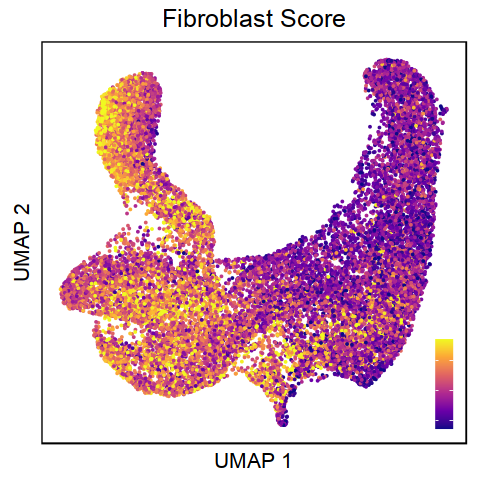

In [106]:
options(repr.plot.width = 4, repr.plot.height = 4)

fibr_score

In [107]:
saveRDS(fibr_score, file=sprintf("./Fig1/subfigs/%s_fibroblast_expr_score.rds",
                                   format(Sys.Date(), "%Y%m%d")))

In [102]:
plot_df <- data.frame(pc1=data.frame(Embeddings(rna, reduction='umap'))$UMAP_1,
                 pc2=data.frame(Embeddings(rna, reduction='umap'))$UMAP_2,
                 frac=pluri_avg_rank)
plot_df = plot_df[sample(dim(plot_df)[1], 20000), ]

pluri_score <- ggplot(plot_df, aes(x=pc1, y=pc2, col=frac)) +
geom_point(stroke=0, size=0.8) +
theme_classic() +
scale_color_viridis_c(limits=c(quantile(fibr_avg_rank, 0.02),
                               quantile(fibr_avg_rank, 0.99)),
                      option="C",
                      oob=squish) +
xlab("UMAP 1") + ylab("UMAP 2") +
ggtitle("Pluripotency Score") +
theme(plot.title = element_text(hjust = 0.5),
      text = element_text(size=12),
      axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.text.y=element_blank(),
      axis.ticks=element_blank(),
      legend.title = element_blank(),
      legend.text = element_blank(), # no numbers
      legend.background = element_blank(), # strip whitespace around colorbar
      legend.key.size = unit(0.15, "inches"),
      legend.position = c(0.96, 0.16), 
      panel.border = element_rect(colour = "black", fill=NA, size=0.5)) +
coord_fixed()

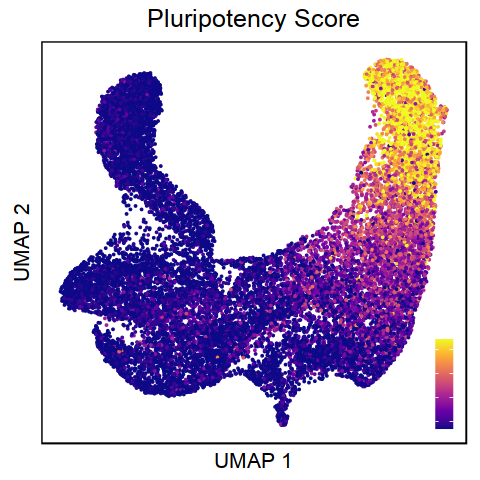

In [103]:
options(repr.plot.width = 4, repr.plot.height = 4)

pluri_score

In [104]:
saveRDS(pluri_score, file=sprintf("./Fig1/subfigs/%s_pluripotency_expr_score.rds",
                                   format(Sys.Date(), "%Y%m%d")))